## Die Standard-Normalverteilung: Ein Beispiel in Python
----------------------------------------

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy.stats
import statsmodels.api as smi


%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


### Vorbereitung der Daten

Jetzt sind wir bereit, einige Übungen zu machen. Dazu laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Zuerst laden wir den Datensatz und geben ihm einen passenden Namen.

In [12]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv('students.csv', index_col=0)

In [13]:
# Lese Spalte 'height' ein
height = students['height']

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud.id, Name, Geschlecht, Alter, Größe, Gewicht, Religion, nc.score, Semester, Hauptfach, Nebenfach, score1, score2, online.tutorial, graduated, salary*. In diesem Abschnitt verwenden wir die Variable `height`, um das bisher Besprochene zu üben.

Zunächst wollen wir sicherstellen, dass wir es mit normalverteilten Daten zu tun haben. Wenn eine Variable normalverteilt ist, sollte ein Histogramm der Beobachtungen bei einer großen Stichprobe in etwa die Form einer Glocke haben.

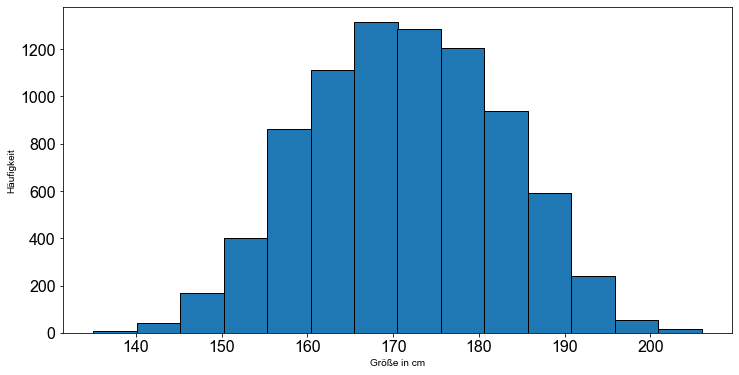

In [14]:
# Plotte die Werte als Histogramm
fig= plt.figure()
ax = fig.add_subplot(111)
ax.hist(height,bins=14,edgecolor='k')

# Erzeuge Labels
ax.set_ylabel('Häufigkeit')
ax.set_xlabel('Größe in cm')

plt.show()

Aus dem Diagramm kann man schließen, dass die Variable `height` normalverteilt ist. Allerdings ist es vor allem bei kleinen Stichproben oft schwierig, eine klare Form in einem Histogramm festzustellen, insbesondere, ob sie glockenförmig ist. Daher ist eine empfindlichere grafische Technik zur Beurteilung der Normalität erforderlich. **Normal-Quantil-Plot** bieten eine solche Technik. Die Idee hinter einem Normal-Quantil-Plot oder kurz Q-Q Plot ist einfach: Man vergleicht die beobachteten Werte der Variablen mit den Beobachtungen, die für eine normalverteilte Variable erwartet werden. Genauer gesagt ist ein Q-Q Plot eine Darstellung der beobachteten Werte der Variablen im Vergleich zu den Werten, die für eine Variable mit der Standardnormalverteilung erwartet werden. Wenn die Variable normalverteilt ist, sollte der Q-Q Plot in etwa linear sein (d. h. in etwa auf einer Geraden liegen) ({cite:p}`fahrmeirstatistik` s.88).

Bei der Verwendung eines Normal-Quantil-Plots zur Beurteilung der Normalität einer Variablen sind zwei Dinge zu beachten:

1) Die Entscheidung, ob eine normale Wahrscheinlichkeitsverteilung annähernd linear ist, ist eine subjektive Entscheidung, und
2) dass wir nur eine begrenzte Anzahl von Beobachtungen dieser bestimmten Variablen verwenden, um ein Urteil über alle möglichen Beobachtungen der Variablen zu fällen.

In Python können wir die Funktion `qqplot()` verwenden, um Normalwahrscheinlichkeitsplots zu erstellen, die auch als <a href="https://de.wikipedia.org/wiki/Quantil-Quantil-Diagramm">Q-Q-Plots</a> bezeichnet werden.

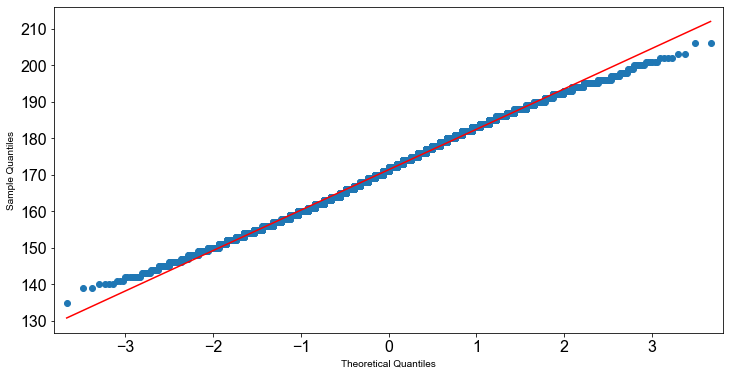

In [15]:
# Erzeuge Q-Q Plot
smi.qqplot(height, line = "r")
pylab.show()

Bei der Betrachtung des Diagramms sehen wir, dass die Quantile der Stichprobe im Vergleich zu den theoretischen Quantilen am unteren und oberen Ende etwas abweichen. Dieser Tatsache muss etwas mehr Aufmerksamkeit geschenkt werden! Was könnte der Grund für die Abweichung am oberen und unteren Ende der Verteilung sein? Irgendeine Vermutung?

Was ist mit dem Geschlecht? Ehrlich gesagt scheint es natürlich zu sein, dass die durchschnittliche Körpergröße von Männern und Frauen unterschiedlich ist. Stellen wir ein Histogramm der Körpergröße von Männern und Frauen auf.

In [16]:
# Lese Spalte 'height' ein
genderheight = students[{'gender','height'}]
male_height = students.loc[students['gender']== 'Male']
female_height = students.loc[students['gender']== 'Female']

C:\Users\zak\AppData\Local\Temp\ipykernel_19812\2126403039.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  genderheight = students[{'gender','height'}]


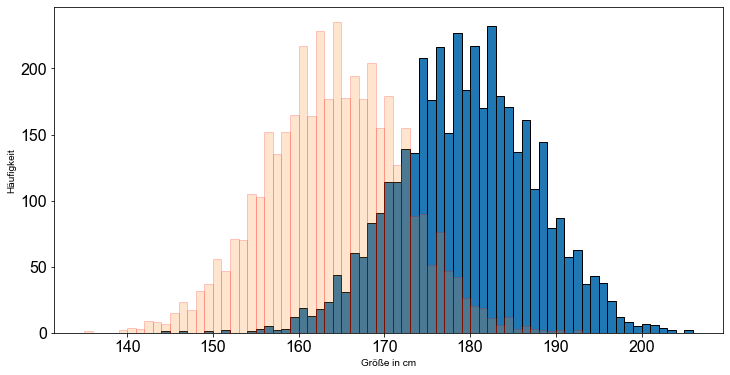

In [17]:
# Bestimme Anzahl Bins
bins1 = max(male_height['height'])-min(male_height['height'])
bins2 = max(female_height['height'])-min(female_height['height'])

# Plotte die Werte als Histogramm
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(male_height['height'],bins1,edgecolor='k')
ax.hist(female_height['height'],bins2,edgecolor='r',alpha = 0.2)
# Erzeuge Labels
ax.set_ylabel('Häufigkeit')
ax.set_xlabel('Größe in cm')

plt.show()

Das ist es! Offensichtlich haben die beiden Gruppen unterschiedliche Mittelwerte, so dass die Zusammenfassung zu einer Gruppe dazu führt, dass die linken und rechten Ausläufer der sich ergebenden Verteilung weiter reichen, als bei einer normalverteilten Variablen zu erwarten wäre. Um fortzufahren, betrachten wir also nur die Körpergröße der Studentinnen. Der Klarheit halber zeichnen wir noch einmal den Normalwahrscheinlichkeitsplit der Größenvariablen, um sicherzustellen, dass unsere Zielvariablen normalverteilt sind.

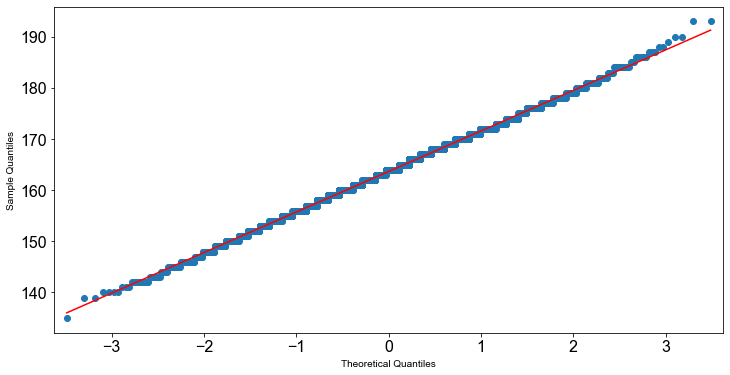

In [18]:
# Erzeuge Q-Q Plot
smi.qqplot(female_height['height'], line = "r")
pylab.show()

Bevor wir mit den eigentlichen Übungen beginnen, berechnen wir zunächst den Mittelwert $\bar{x}$ und die Standardabweichung $s$ der Zielvariablen. Außerdem standardisieren wir die Variable, um eine Standardnormalverteilung mit $\bar{x}=0$ und $s=1$ zu erhalten, und weisen ihr einen geeigneten Variablennamen zu.

In [19]:
# Heights
height_mean = np.mean(female_height['height'])
height_mean

163.65328467153284

In [20]:
height_sd = np.std(female_height['height'])
height_sd

7.918762263149209

In [21]:
height_z = (female_height['height'] - height_mean)/height_sd

Die Variable `height` hat einen Mittelwert von $163,7$ cm und eine Standardabweichung von $7,9$ cm.

### Suche nach dem Bereich links von einem angegebenen $z$-Scores oder $x$-Wertes

**Frage 1**

Wie hoch ist die Wahrscheinlichkeit, dass eine zufällig ausgewählte Studentin aus dem `students` Datensatz eine Körpergröße von $168$ cm oder weniger hat? Wir suchen also nach $P(x \le 168)$.

Zunächst berechnen wir die Wahrscheinlichkeit für die standardisierte Variable. Dazu müssen wir den Wert, der uns interessiert ($168$ cm), in einen $z$-Score umwandeln.

$$z = \frac{x-\mu}{\sigma} = \frac{ 168- 163,7}{7,9}  = 0,55$$

In [22]:
height_z2 = (168 - height_mean)/height_sd
height_z2

0.5489134771345582

Dann müssen wir die Fläche unter der Kurve links neben dem erhaltenen $z$-Wert berechnen. Zur Erinnerung: Die Fläche unter der Kurve einer normalverteilten Variablen kann mit Hilfe der Funktion `norm.cdf()`  berechnet werden. Die `norm.cdf()` -Funktion wird als `norm.cdf(q, loc = 0, scale = 1)` geschrieben. Für dieses spezielle Beispiel können wir alle Standardargumente akzeptieren.

In [23]:
x = 168 # height in cm 
x_z = (x-height_mean)/height_sd # z-transformation
scipy.stats.norm.cdf(x_z)

0.7084675855873308

Genial, wir haben ein Ergebnis: $P(z\le 0,55) \approx 0,71$

Nun führen wir die gleiche Berechnung durch, überspringen aber diesmal den Schritt der Standardisierung. Dank der Leistungsfähigkeit von Python müssen wir uns nicht auf Tabellen verlassen, sondern können den Stichprobenmittelwert $\bar x$ und die Standardabweichung der Stichprobe, $s$, in die Funktion `stats.norm.cdf` eingeben.

In [25]:
x = 168
scipy.stats.norm.cdf(x, loc = height_mean, scale = height_sd)

0.7084675855873308

Perfekt! Die Zahlen stimmen überein: $P(x \le 168) \approx 0,71$. Um sicherzustellen, dass wir verstehen, was vor sich geht, werden unten sowohl die Fläche unter der Kurve für die standardisierte Variable in $z$-Werten (linkes Feld) als auch die Fläche für die nicht standardisierte Variable in cm (rechtes Feld) dargestellt.

![Alt-Text](39_standard.png)

### Ermitteln der Fläche rechts von einem bestimmten $x$-Wert

**Frage 2**

Wie hoch ist die Wahrscheinlichkeit, dass eine zufällig ausgewählte Studentin aus dem `students` Datensatz eine Körpergröße von $185$ cm oder mehr hat? Wir suchen also nach $P(x \ge 175)$. Um die Fläche unter der Kurve rechts vom interessierenden Wert zu erhalten, müssen wir in die Funktion `stats.norm.sf()` oder `1 -stats.norm.cdf` verwenden.

In [26]:
x = 175 #height in cm
scipy.stats.norm.sf(x, loc = height_mean, scale = height_sd)

0.07594463650610317

In [27]:
x = 175 #height in cm
1-scipy.stats.norm.cdf(x, loc = height_mean, scale = height_sd)

0.07594463650610317

Antwort: : $P(x \ge 175) \approx 0,08$

### Ermitteln der Fläche zwischen zwei angegebenen $x$-Werten

Um die Fläche unter einer Kurve für ein Intervall $[a \ $,$ \ b]$ zu bestimmen, verwenden wir die Gleichung

$$P(a \le x \le b)  = \int_{a}^{b}f(x)dx = P(x \le b)- P(x \le a)\text{.}$$

**Frage 3**

Wie hoch ist die Wahrscheinlichkeit, dass eine zufällig ausgewählte Studentin aus dem `students` Datensatz eine Körpergröße zwischen $155$ und $165$ cm hat, $P(155≤x≤165)$?

In [28]:
x_lower = 155 # height in cm
x_upper = 165 # height in cm

cdf_upper = scipy.stats.norm.cdf(x_upper, loc = height_mean, scale = height_sd)
cdf_lower = scipy.stats.norm.cdf(x_lower, loc = height_mean, scale = height_sd)
cdf_upper - cdf_lower

0.4302708345408188

Antwort: : $P(155≤x≤165)≈0,43$

**Frage 4**

Wie hoch ist die Wahrscheinlichkeit, dass eine zufällig ausgewählte Studentin aus dem Studentendatensatz eine Körpergröße zwischen $170$ und $180$ cm hat, $P(170≤x≤180)$?

In [29]:
x_lower = 170 # height in cm
x_upper = 180 # height in cm

cdf_upper = scipy.stats.norm.cdf(x_upper, loc = height_mean, scale = height_sd)
cdf_lower = scipy.stats.norm.cdf(x_lower, loc = height_mean, scale = height_sd)
cdf_upper - cdf_lower

0.1919328752280871

Antwort: : $P(170≤x≤180)≈0,19$

### $z_\alpha$ finden

**Frage 5**

Wir möchten wissen, welche Körpergröße der Studentinnen in unserem `students` Datensatz mit einer Wahrscheinlichkeit von $0,60$ übereinstimmt. Oder anders ausgedrückt: Wenn wir eine Anzahl von $n$ Studenten aus dem `students` Datensatz zufällig auswählen, welche Größe teilt die Stichprobe in $60 \%$ der $n$ Studierenden, die kleiner sind, und $40 \%$ der n Studentinnen, die größer als diese bestimmte Größe sind. Wir suchen also nach $P(X<?)=0,60$.

Um $P(X<?)=0,60$ zu lösen, werden wir zwei Ansätze wählen. Der erste Ansatz verwendet den $z$-Score, und der zweite verwendet Python, um den Standardisierungsschritt überflüssig zu machen. .

Für beide Ansätze verwenden wir die `norm.ppf()`-Funktion, die wie folgt geschrieben wird: `norm.ppf(p, loc = 0, scale = 1)`.

Für den ersten Ansatz müssen wir die Gleichung für die Standardisierung von oben umstellen und sie für $x$ lösen

$$z = \frac{x-\mu}{\sigma} \implies x = z \sigma + \mu$$

Für die Berechnung von $x$ benötigen wir den Mittelwert (`height_mean`) und die Standardabweichung (`height_sd`) für die Variable `height`, die $163,7$ cm bzw. $7,9$ cm beträgt. Außerdem müssen wir einen $z$-Score für die gegebene Wahrscheinlichkeit von $0,60$ erhalten. Wir können diesen $z$-Score in einer Tabelle nachschlagen oder die `norm.ppf()`-Funktion in Python anwenden. Wir wollen den $z$-Score ermitteln, bei dem der Bereich links von diesem $z$-Score $0,60$ entspricht; erinnern Sie sich, dass wir nach $P(X<?)=0,60$ suchen.

In [30]:
z = scipy.stats.norm.ppf(0.6, loc = 0, scale = 1)
z

0.2533471031357997

Da wir nun $z$ kennen, können wir in die Gleichung von oben einsetzen

\begin{align}
x & = z \sigma + \mu \\
 & = 0,25 \times 7,9 + 163,7 \\
 & \approx 165,66 
\end{align}

Perfekt, wir sind fertig: $P(X<165,66)=0,60$

Nun gehen wir den zweiten Ansatz durch, bei dem wir den Schritt der $z$-Berechnung überspringen. Alles, was wir tun müssen, ist, die `norm.ppf()`-Funktion mit dem Mittelwert und der Standardabweichung unserer Variablen `height` zu füttern.

In [31]:
x = scipy.stats.norm.ppf(0.6, loc = height_mean, scale = height_sd)
x

165.65948015132278

Keine Überraschung, die Zahlen stimmen überein: $P(X<165,66)=0,60$.